Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
## Importing Important Libraries
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from collections import Counter

pd.set_option('max_columns',None)

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.display import Image
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
#df.head(10)

In [3]:
df = pd.read_csv("C:/Users/ASUS/Desktop/DataTrained/dataset1-master/census_income.csv")
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df.shape

(32560, 15)

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

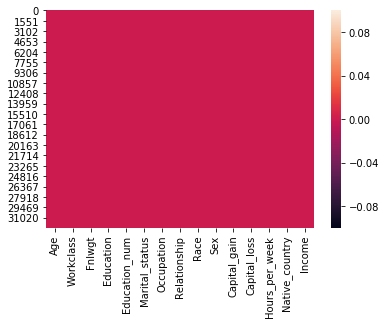

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
#all the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ': ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')

Workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtyp

    Workclass ,Occupation, Native_country having unknown '?' value

In [10]:
# Replacing ? to mode value
# df['column name'] = df['column name'].replace(['old value'],'new value')

In [11]:
df['Workclass'] = df['Workclass'].replace(['?'],'Workclass')
df['Occupation'] = df['Occupation'].replace(['?'],'Prof-specialty')
df['Native_country'] = df['Native_country'].replace(['?'],'United-States')

In [12]:
#df['Workclass'].value_counts()

In [13]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


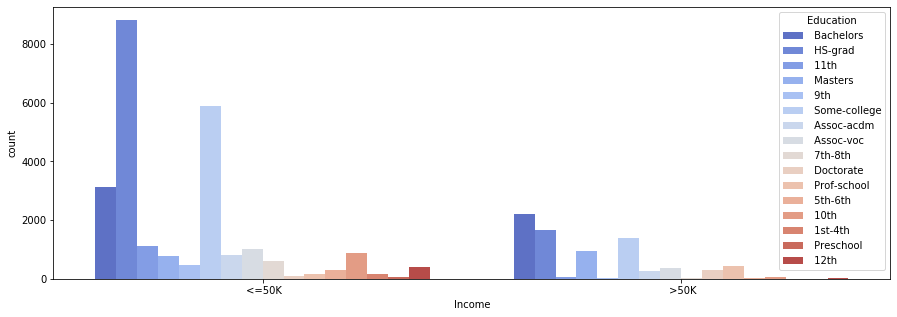

In [14]:
plt.figure(figsize= (15,5))
sns.countplot(df['Income'], palette='coolwarm', hue='Education', data=df)

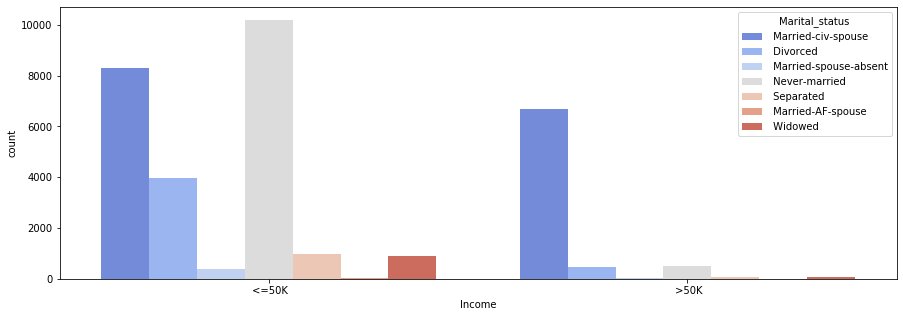

In [15]:
plt.figure(figsize= (15,5))
sns.countplot(df['Income'], palette='coolwarm', hue='Marital_status', data=df)

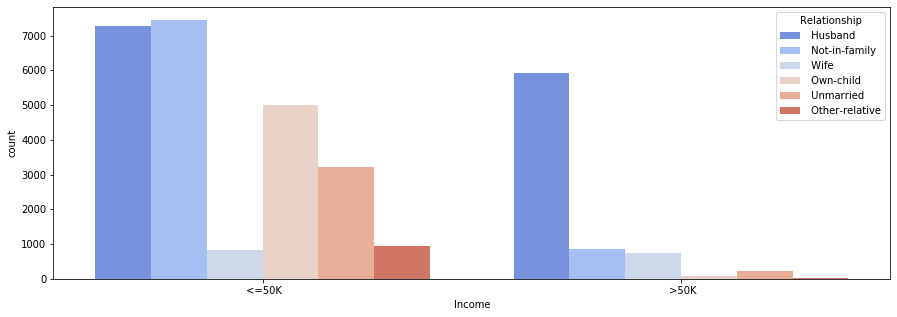

In [16]:
plt.figure(figsize= (15,5))
sns.countplot(df['Income'], palette='coolwarm', hue='Relationship', data=df)

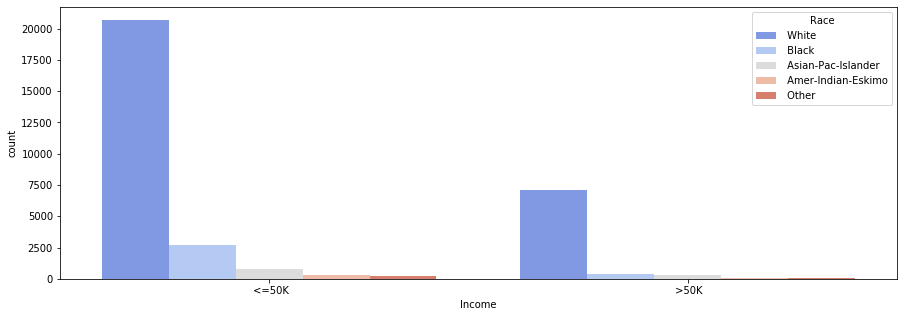

In [17]:
plt.figure(figsize= (15,5))
sns.countplot(df['Income'], palette='coolwarm', hue='Race', data=df)

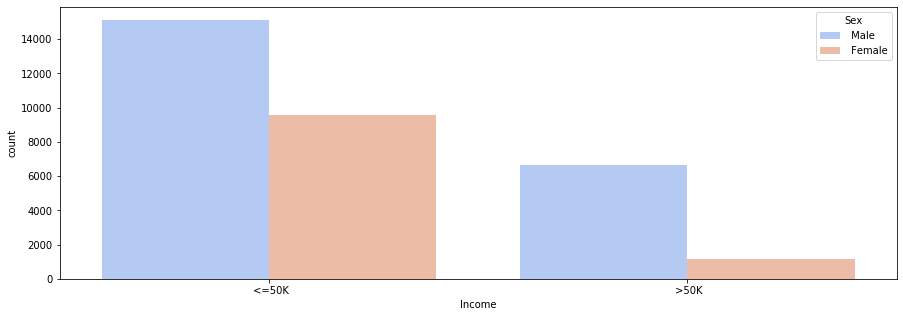

In [18]:
plt.figure(figsize= (15,5))
sns.countplot(df['Income'], palette='coolwarm', hue='Sex', data=df)

# Summary Statistics

In [19]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# To Check correlation

In [20]:
dfcor=df.corr()
dfcor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


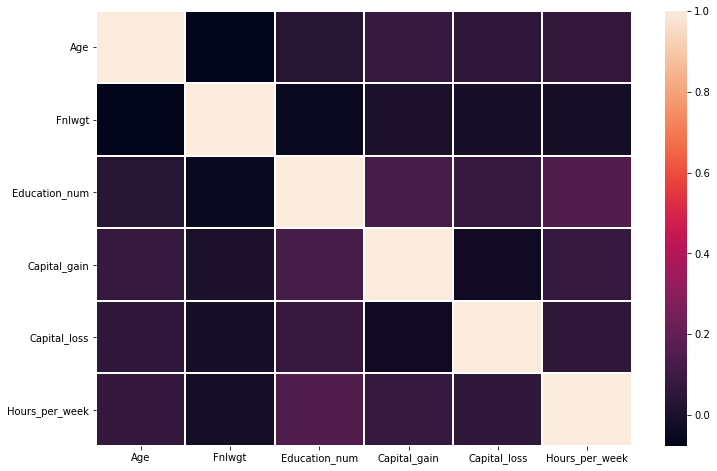

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,linewidths=1)

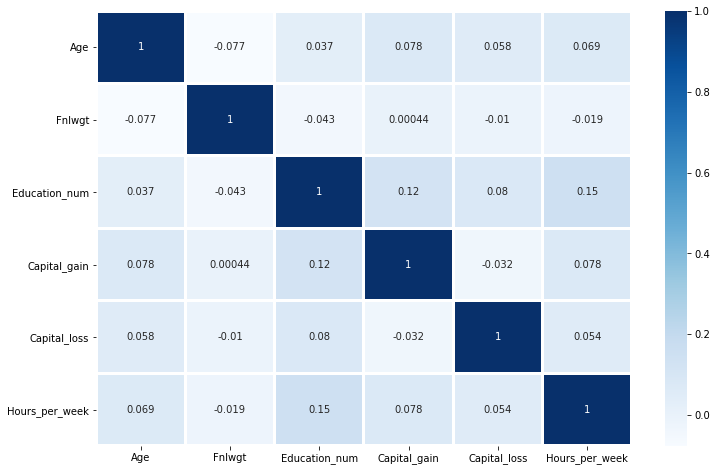

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Blues',annot=True,linewidths=2)

# Feature Engineering

In [23]:
#
df.Income = df.Income.replace('<=50K', 0)
df.Income = df.Income.replace('>50K', 1)

In [24]:
# education Category
df.Education= df.Education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.Education = df.Education.replace('HS-grad', 'high school')
df.Education = df.Education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.Education = df.Education.replace('Bachelors', 'undergrad')
df.Education = df.Education.replace('Masters', 'grad')
df.Education = df.Education.replace('Doctorate', 'doc')

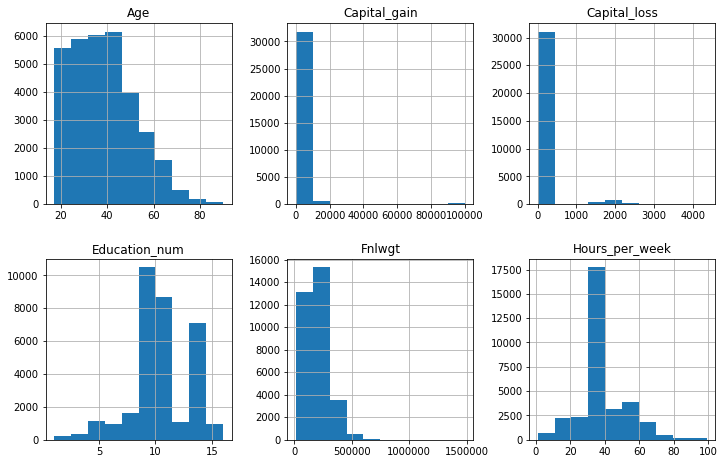

In [25]:
df.hist(figsize=(12,12), layout=(3,3), sharex=False);

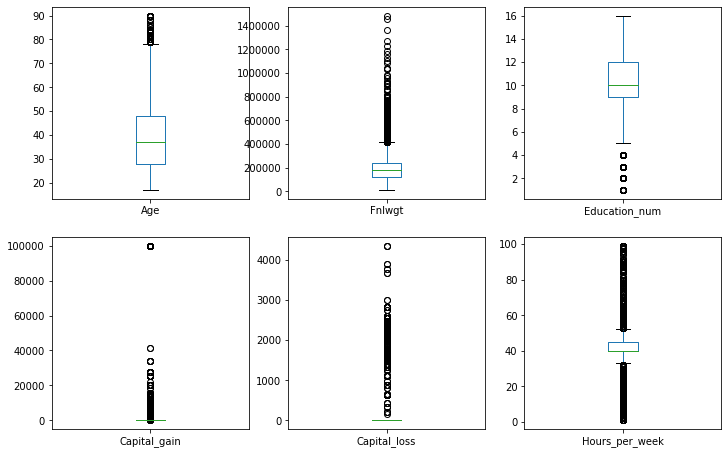

In [26]:
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

# Model Building

In [28]:
cols = ['Workclass',"Occupation","Marital_status",'Relationship',"Education","Race","Sex",'Native_country']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,<=50K


In [29]:
#seprating the features and label columns
X = df.drop(columns=['Income'], axis=1)
y = df['Income']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)

In [31]:
#As the data points differ a lot in magnitude we'll Scale them using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
x_train

array([[ 0.54403806,  0.09336339,  0.02934255, ..., -0.21798873,
        -0.03226326,  0.29428144],
       [ 0.54403806,  0.09336339,  0.41308584, ..., -0.21798873,
         0.61906027,  0.29428144],
       [ 0.32409005,  0.09336339,  0.86745328, ..., -0.21798873,
         0.37481394,  0.29428144],
       ...,
       [ 2.52357012, -1.28038634,  0.14820017, ..., -0.21798873,
        -2.80038825,  0.29428144],
       [-0.18912196,  0.09336339, -0.98149249, ...,  4.40980977,
         0.78189115,  0.29428144],
       [-0.11580596,  0.09336339, -0.60010113, ..., -0.21798873,
        -0.03226326,  0.29428144]])

In [33]:
x_test

array([[-0.70269929,  0.08256019, -0.18621971, ..., -0.21358139,
        -0.0426977 ,  0.28519587],
       [ 1.49632678,  0.76948345, -1.49380051, ..., -0.21358139,
         3.15815494,  0.28519587],
       [ 1.78953025,  0.08256019, -0.07779346, ..., -0.21358139,
        -0.44280428,  0.28519587],
       ...,
       [ 1.78953025,  0.76948345, -1.42656111, ..., -0.21358139,
         1.55772862,  0.28519587],
       [-0.48279668,  0.76948345,  0.19197708, ..., -0.21358139,
         0.75751546, -4.56581844],
       [ 0.98322069,  0.08256019, -0.14553387, ..., -0.21358139,
        -0.0426977 ,  0.28519587]])

In [34]:
#Using Logistic Regression 
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("Accuracy is", lr.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(lr, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 82.14578214578214
Cross validation is 82.55536185362004


In [35]:
#Using K nearest neighbors(KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
print("Accuracy is", knn.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(knn, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 82.37100737100738
Cross validation is 82.55092969068892


In [36]:
#Using GaussianNB 
gauss = GaussianNB()
gauss.fit(x_train,y_train)
print("Accuracy is", gauss.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(gauss, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 80.2006552006552
Cross validation is 80.85297432781509


In [37]:
#Using Decision Tree Classifier
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train)
print("Accuracy is", tree.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(tree, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 80.7022932022932
Cross validation is 81.10307151297296


In [38]:
#Using Random Forest Classifier
forest = RandomForestClassifier(n_estimators=10,criterion='entropy')
forest.fit(x_train,y_train)
print("Accuracy is", forest.score(x_test, y_test)*100)
# cross validation - it is used for better validation of model
score = cross_val_score(forest, x_train, y_train, cv=5)
print("Cross validation is",np.mean(score)*100)

Accuracy is 84.97133497133497
Cross validation is 84.62185276730105


# Hyperparameter Tuning

In [39]:
#Tuning three hyperparameters now, by passing the diffrent values for both parameters

grid_param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(2,20,3),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,2),
    'max_features' : ['auto','random']
}

In [40]:
#selecting Random Forest Classifier for hyperparameter tuning
grid_search = GridSearchCV(estimator=forest,param_grid=grid_param,cv=5,n_jobs=-1)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 3),
                         'max_features': ['auto', 'random'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10, 2)})

In [43]:
#Lets see the best parameter as per theour grid search
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 6}

In [44]:
forest = RandomForestClassifier(criterion = 'gini',
 max_depth= 14,
 max_features= 'auto',
 min_samples_leaf= 6,
 min_samples_split= 6)

In [48]:
forest.fit(x_train,y_train)
print("Accuracy is", forest.score(x_test, y_test)*100)

Accuracy is 85.995085995086


# Confusion Matrix

In [49]:
y_pred = forest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7031,  370],
       [ 998, 1369]], dtype=int64)

# Model Saving

In [ ]:
import joblib
joblib.dump(forest,"FinalModel.pkl")